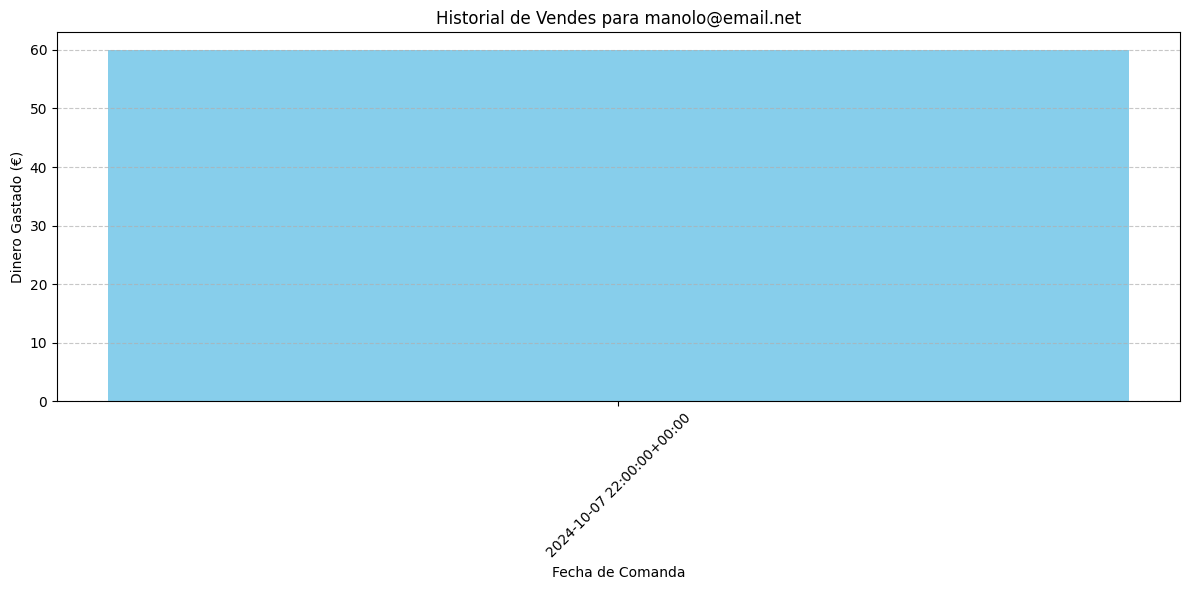

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def obtener_historial_ventas(correu):
    url = f"http://localhost:26968/historial_vendas?email={correu}" 
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()  
    else:
        print("Error al conectar con la API:", response.json())
        return None

correo_cliente = input("Introduce el correo del cliente: ")

historial = obtener_historial_ventas(correo_cliente)

# Verificar si se obtuvieron datos
if historial:
    df = pd.DataFrame(historial)
    
    # Asegurarse de que 'diners_gastats' sea numérico para la visualización
    df['diners_gastats'] = pd.to_numeric(df['diners_gastats'], errors='coerce')

    # Convertir 'data_comanda' a tipo datetime
    df['data_comanda'] = pd.to_datetime(df['data_comanda'])

    # Crear un identificador único para cada pedido
    df['pedido'] = df['data_comanda'].dt.strftime('%Y-%m-%d') + ' - ID: ' + df['comanda_id'].astype(str)

    # Visualizar el historial de ventas por fecha y comanda
    plt.figure(figsize=(12, 6))
    
    # Usar un gráfico de barras donde cada barra es un pedido
    plt.bar(df['pedido'], df['diners_gastats'], color='skyblue')
    
    # Configuración del gráfico
    plt.title(f'Historial de Vendes para {correo_cliente}')
    plt.xlabel('Pedido (Fecha - ID de Comanda)')
    plt.ylabel('Dinero Gastado (€)')
    plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X para mejor legibilidad
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  # Ajustar el diseño para que no se superpongan elementos
    plt.show()
else:
    print("No se encontraron datos de ventas.")
